<a href="https://colab.research.google.com/github/sonuuno2020/CNN/blob/main/03_Introduction_to_computer_vision_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Convolutional neural network and computer vision by Tensorflow**

**Computer Vision** 🐾 discovering patterns in visual data...

## **Get Data**

In [ ]:
import zipfile

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-01-19 12:32:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.128, 74.125.31.128, 74.125.134.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   184MB/s    in 0.6s    

2022-01-19 12:32:55 (184 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



**This dataset is modified as required by this notebook**
https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb



## **Inspect data**

In [ ]:
import os

for dirpath,dirname,filename in os.walk("pizza_steak"):
  print(f"There are {len(dirname)} directories and {len(filename)} images ,path:{dirpath}")

There are 2 directories and 0 images ,path:pizza_steak
There are 2 directories and 0 images ,path:pizza_steak/train
There are 0 directories and 750 images ,path:pizza_steak/train/steak
There are 0 directories and 750 images ,path:pizza_steak/train/pizza
There are 2 directories and 0 images ,path:pizza_steak/test
There are 0 directories and 250 images ,path:pizza_steak/test/steak
There are 0 directories and 250 images ,path:pizza_steak/test/pizza


* let visualize our data as we are exploring our data 🤯

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random


In [ ]:
def view_random_image(target_path,target_class):
  target_folder=target_path+target_class # target directory

  # random image
  random_image=random.sample(os.listdir(target_folder),1)
  print(target_folder+"/"+random_image[0])
  image=plt.imread(target_folder+"/"+random_image[0])
  # print(image)
  plt.imshow(image)
  plt.title(target_class)
  plt.axis("off")
  print("shape of image:",image.shape)



pizza_steak/test/pizza/1342321.jpg
shape of image: (512, 512, 3)


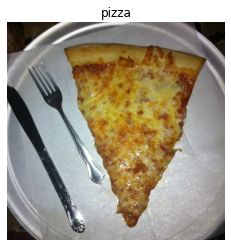

In [ ]:
view_random_image("pizza_steak/test/","pizza")

pizza_steak/test/steak/3013185.jpg
shape of image: (512, 512, 3)


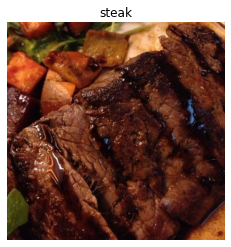

In [ ]:
view_random_image("pizza_steak/test/","steak")

In [ ]:
img=plt.imread('pizza_steak/test/steak/228683.jpg')
img

array([[[ 93,  95, 107],
        [ 80,  82,  94],
        [105, 108, 117],
        ...,
        [ 81,  83,  80],
        [ 81,  83,  80],
        [ 82,  82,  80]],

       [[ 94,  98, 107],
        [ 91,  95, 104],
        [ 93,  98, 104],
        ...,
        [ 80,  82,  79],
        [ 80,  82,  79],
        [ 81,  81,  79]],

       [[ 56,  61,  67],
        [ 60,  65,  71],
        [ 52,  57,  61],
        ...,
        [ 83,  85,  82],
        [ 82,  84,  83],
        [ 82,  84,  83]],

       ...,

       [[ 26,  16,   6],
        [ 27,  17,   7],
        [ 27,  17,   7],
        ...,
        [ 14,   4,   2],
        [ 15,   5,   3],
        [ 16,   5,   3]],

       [[ 24,  18,   6],
        [ 23,  17,   5],
        [ 22,  16,   4],
        ...,
        [ 13,   3,   2],
        [ 14,   4,   3],
        [ 14,   4,   3]],

       [[ 19,  15,   3],
        [ 18,  14,   2],
        [ 17,  13,   1],
        ...,
        [  9,   0,   0],
        [ 10,   0,   1],
        [ 11,   1,   2]]

**normalise it i.e 0~1**

In [ ]:
img/255.0

array([[[0.36470588, 0.37254902, 0.41960784],
        [0.31372549, 0.32156863, 0.36862745],
        [0.41176471, 0.42352941, 0.45882353],
        ...,
        [0.31764706, 0.3254902 , 0.31372549],
        [0.31764706, 0.3254902 , 0.31372549],
        [0.32156863, 0.32156863, 0.31372549]],

       [[0.36862745, 0.38431373, 0.41960784],
        [0.35686275, 0.37254902, 0.40784314],
        [0.36470588, 0.38431373, 0.40784314],
        ...,
        [0.31372549, 0.32156863, 0.30980392],
        [0.31372549, 0.32156863, 0.30980392],
        [0.31764706, 0.31764706, 0.30980392]],

       [[0.21960784, 0.23921569, 0.2627451 ],
        [0.23529412, 0.25490196, 0.27843137],
        [0.20392157, 0.22352941, 0.23921569],
        ...,
        [0.3254902 , 0.33333333, 0.32156863],
        [0.32156863, 0.32941176, 0.3254902 ],
        [0.32156863, 0.32941176, 0.3254902 ]],

       ...,

       [[0.10196078, 0.0627451 , 0.02352941],
        [0.10588235, 0.06666667, 0.02745098],
        [0.10588235, 0

## **Building an end to end**

* Load images
* preprocess images
* bulid CNN
* compile CNN
* fit images into CNN

In [ ]:
import tensorflow as tf

# Generate batches of tensor image data with real-time data augmentation(adding newly created data from existing data).
# The data will be looped over (in batches).

from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# preprocess our data i.e Scaling and Normalisation
train_gen=ImageDataGenerator(rescale=1/255)
valid_gen=ImageDataGenerator(rescale=1/255)

# Seting path to directories
train_dir="pizza_steak/train"
test_dir="pizza_steak/test"

# Import images
train_data=train_gen.flow_from_directory(directory=train_dir,
                                         batch_size=32,
                                         target_size=(224,224),
                                         class_mode='binary',
                                         seed=42)
valid_data=valid_gen.flow_from_directory(directory=test_dir,
                                       batch_size=32,
                                       target_size=(224,224),
                                       class_mode='binary',
                                       seed=42)

# create CNN model
model_1=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation='relu',
                         input_shape=(224,224,3)
                         ),
  tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
  tf.keras.layers.Conv2D(10,3,activation='relu'),
  tf.keras.layers.Conv2D(10,3,activation='relu'),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1,activation='sigmoid')
])


# compile CNN model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )

history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 209ms/step - loss: 0.6076 - accuracy: 0.6527 - val_loss: 0.4775 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 9s 197ms/step - loss: 0.4323 - accuracy: 0.8047 - val_loss: 0.3284 - val_accuracy: 0.8680
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3697 - accuracy: 0.8387 - val_loss: 0.3220 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3491 - accuracy: 0.8547 - val_loss: 0.3322 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3414 - accuracy: 0.8607 - val_loss: 0.2996 - val_accuracy: 0.8900


**It take's too long so now let's change runtime and make it `GPU`** 10❎ 

⏸ Here we use `CPU` ⏲ ⏲ ⏲ too long time `100 second` for first epoch 😶
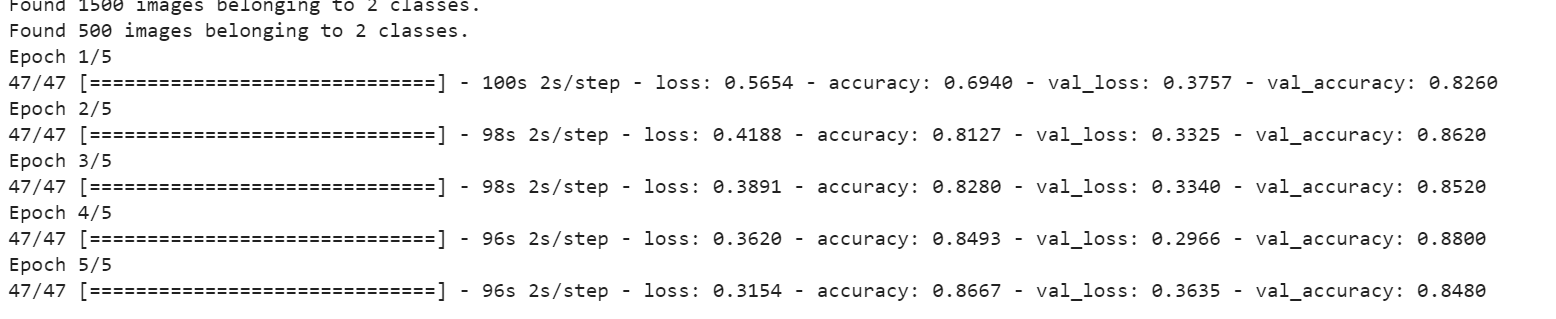

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
len(train_data),len(valid_data)

(47, 16)

In [ ]:
1500/32,500/32

(46.875, 15.625)

In [ ]:
valid_data[0][0]

array([[[[0.34509805, 0.14509805, 0.12941177],
         [0.36078432, 0.16862746, 0.14117648],
         [0.37647063, 0.18431373, 0.15686275],
         ...,
         [0.8117648 , 0.59607846, 0.43529415],
         [0.80392164, 0.59607846, 0.38431376],
         [0.78823537, 0.57254905, 0.34901962]],

        [[0.36862746, 0.19607845, 0.14509805],
         [0.3921569 , 0.20392159, 0.15686275],
         [0.4156863 , 0.20000002, 0.17254902],
         ...,
         [0.72156864, 0.48627454, 0.34117648],
         [0.7058824 , 0.4666667 , 0.28235295],
         [0.8000001 , 0.5647059 , 0.3529412 ]],

        [[0.38431376, 0.21568629, 0.14117648],
         [0.41960788, 0.227451  , 0.17254902],
         [0.45098042, 0.22352943, 0.20784315],
         ...,
         [0.7019608 , 0.44705886, 0.32156864],
         [0.7411765 , 0.4901961 , 0.31764707],
         [0.7176471 , 0.45882356, 0.27058825]],

        ...,

        [[0.63529414, 0.38823533, 0.1764706 ],
         [0.56078434, 0.31764707, 0.09411766]

In [ ]:
len(valid_data[0][0][0][0][0])

3

In [ ]:
2*32*224*224*3

9633792

## Let's check can our Former model work 🛠

**Deep forward neural network**

In [ ]:
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(10,activation='relu'),
  tf.keras.layers.Dense(10,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')                             
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2=model_2.fit(train_data,
                      epochs=10,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data)
                      )

Epoch 1/10
47/47 [==============================] - 9s 185ms/step - loss: 1.0618 - accuracy: 0.5107 - val_loss: 0.6927 - val_accuracy: 0.5040
Epoch 2/10
47/47 [==============================] - 8s 181ms/step - loss: 0.6934 - accuracy: 0.4980 - val_loss: 0.6930 - val_accuracy: 0.5020
Epoch 3/10
47/47 [==============================] - 8s 180ms/step - loss: 0.6933 - accuracy: 0.4993 - val_loss: 0.6930 - val_accuracy: 0.5020
Epoch 4/10
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5020
Epoch 5/10
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5020
Epoch 6/10
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5020
Epoch 7/10
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5020
Epoch 

**😟 It seems we are just guessing...**

## Improving our deep forwarded model

**Various ways to improve our model**

1. Increase number of layers or neurons
2. change learning rate of optimizer
3. increase the time to leran (number of epochs)


**Do one improvement at one time so You can see the difference**

In [ ]:
tf.random.set_seed(42)

# increase number of layers and neurons 

model_3=tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(10,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')                             
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3=model_3.fit(train_data,epochs=10,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 9s 185ms/step - loss: 4.0791 - accuracy: 0.6073 - val_loss: 2.1656 - val_accuracy: 0.6220
Epoch 2/10
47/47 [==============================] - 8s 180ms/step - loss: 1.2272 - accuracy: 0.7160 - val_loss: 0.5412 - val_accuracy: 0.7700
Epoch 3/10
47/47 [==============================] - 8s 179ms/step - loss: 0.9784 - accuracy: 0.7087 - val_loss: 1.8389 - val_accuracy: 0.6540
Epoch 4/10
47/47 [==============================] - 8s 180ms/step - loss: 0.9309 - accuracy: 0.7300 - val_loss: 0.6336 - val_accuracy: 0.6820
Epoch 5/10
47/47 [==============================] - 8s 179ms/step - loss: 0.4703 - accuracy: 0.8107 - val_loss: 0.5943 - val_accuracy: 0.7300
Epoch 6/10
47/47 [==============================] - 9s 181ms/step - loss: 0.6105 - accuracy: 0.7520 - val_loss: 0.5866 - val_accuracy: 0.7220
Epoch 7/10
47/47 [==============================] - 9s 185ms/step - loss: 0.6649 - accuracy: 0.7687 - val_loss: 1.0175 - val_accuracy: 0.6180
Epoch 

**😲 Ohh it's increased 🔝** but it become nearly static later on...

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 15,064,021
Trainable params: 15,064,021
Non-trainable params: 0
_________________________________________________________________


In [ ]:
 15064021/31100

484.3736655948553

This shows our CNN model outperforms it as we can see It takes ~500x less parameter than deep forwarded model.

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

##**Binary Classification 🐾 Let's breakdown our CNN model**

1. Become one with Data
2. preprocess data
3. build baseline CNN model
4. fit data
5. Evaluate model
6. Improve our model
7. Experimenting until we satisfy 🤩

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

### **1. Become one with Data**

pizza_steak/train/steak/854150.jpg
shape of image: (382, 512, 3)
pizza_steak/train/pizza/3256974.jpg
shape of image: (512, 512, 3)


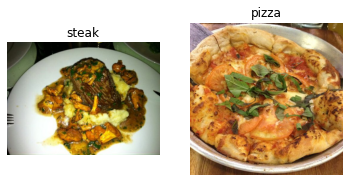

In [ ]:
# Visualize our data

plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

### **2. Preprocess our data**

Normalised and required shaped

In [ ]:
img=plt.imread("pizza_steak/train/pizza/2755875.jpg")
img

array([[[209, 205, 157],
        [217, 213, 165],
        [227, 223, 176],
        ...,
        [105,  90,  67],
        [108,  93,  70],
        [107,  92,  69]],

       [[237, 233, 186],
        [243, 239, 192],
        [250, 247, 202],
        ...,
        [100,  84,  59],
        [105,  91,  65],
        [108,  94,  68]],

       [[255, 255, 215],
        [255, 255, 214],
        [254, 251, 210],
        ...,
        [ 92,  75,  45],
        [ 98,  83,  52],
        [104,  89,  58]],

       ...,

       [[187, 178, 149],
        [187, 178, 149],
        [186, 177, 148],
        ...,
        [166, 151, 130],
        [167, 152, 131],
        [167, 152, 131]],

       [[182, 173, 144],
        [183, 174, 145],
        [185, 176, 147],
        ...,
        [166, 151, 128],
        [167, 152, 129],
        [168, 153, 130]],

       [[181, 172, 143],
        [183, 174, 145],
        [185, 176, 147],
        ...,
        [164, 152, 128],
        [166, 154, 130],
        [167, 155, 131]]

**Let's make in normal form i.e Normalised Data (0~1)**

In [ ]:
img/255.0

array([[[0.81960784, 0.80392157, 0.61568627],
        [0.85098039, 0.83529412, 0.64705882],
        [0.89019608, 0.8745098 , 0.69019608],
        ...,
        [0.41176471, 0.35294118, 0.2627451 ],
        [0.42352941, 0.36470588, 0.2745098 ],
        [0.41960784, 0.36078431, 0.27058824]],

       [[0.92941176, 0.91372549, 0.72941176],
        [0.95294118, 0.9372549 , 0.75294118],
        [0.98039216, 0.96862745, 0.79215686],
        ...,
        [0.39215686, 0.32941176, 0.23137255],
        [0.41176471, 0.35686275, 0.25490196],
        [0.42352941, 0.36862745, 0.26666667]],

       [[1.        , 1.        , 0.84313725],
        [1.        , 1.        , 0.83921569],
        [0.99607843, 0.98431373, 0.82352941],
        ...,
        [0.36078431, 0.29411765, 0.17647059],
        [0.38431373, 0.3254902 , 0.20392157],
        [0.40784314, 0.34901961, 0.22745098]],

       ...,

       [[0.73333333, 0.69803922, 0.58431373],
        [0.73333333, 0.69803922, 0.58431373],
        [0.72941176, 0

In [ ]:
# Define directory

train_dir="pizza_steak/train"
test_dir="pizza_steak/test"

Our next step ist make out data into **batches**

* purpose: To avoid memory overflow , avoid all images load in memory at once
* Increase the number of attempt to learn pattern

In [ ]:
# create train and test data generator and rescale them

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# generate batches of tensor

train_gen=ImageDataGenerator(rescale=1/255)
valid_gen=ImageDataGenerator(rescale=1/255)


In [ ]:
# load from directories

train_data=train_gen.flow_from_directory(directory=train_dir,
                                         target_size=(224,224),
                                         class_mode='binary',
                                         batch_size=32,
                                         )

valid_data=valid_gen.flow_from_directory(directory=test_dir,
                                         target_size=(224,224),
                                         class_mode='binary',
                                         batch_size=32) # minibatches


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
len(train_data),len(valid_data) # number of batches

(47, 16)

In [ ]:
img,label=train_data.next()
len(img),len(label) # no. of minibatch

(32, 32)

In [ ]:
img[9] # normalised and required shape

array([[[0.07058824, 0.03529412, 0.01568628],
        [0.05882353, 0.02352941, 0.00392157],
        [0.09019608, 0.05490196, 0.03529412],
        ...,
        [0.04313726, 0.03921569, 0.02352941],
        [0.04705883, 0.04313726, 0.02745098],
        [0.02745098, 0.02352941, 0.00784314]],

       [[0.08235294, 0.04705883, 0.02745098],
        [0.0627451 , 0.02745098, 0.00784314],
        [0.09019608, 0.05490196, 0.03529412],
        ...,
        [0.03921569, 0.03529412, 0.02745098],
        [0.04313726, 0.03921569, 0.03137255],
        [0.03921569, 0.03529412, 0.02745098]],

       [[0.0627451 , 0.02745098, 0.00784314],
        [0.07450981, 0.03921569, 0.01960784],
        [0.09019608, 0.05490196, 0.03529412],
        ...,
        [0.05882353, 0.05490196, 0.04705883],
        [0.0509804 , 0.04705883, 0.03921569],
        [0.03921569, 0.03529412, 0.02745098]],

       ...,

       [[0.8431373 , 0.60784316, 0.37254903],
        [0.8235295 , 0.5882353 , 0.3529412 ],
        [0.86274517, 0

In [ ]:
img.shape # required shape for CNN model

(32, 224, 224, 3)

### **3. Building baseline model**

In [ ]:
from tensorflow.keras.layers import Flatten,MaxPool2D,Conv2D,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

* filters = number of filter from shich image-portion will be passed. 
 🔥 higher the numbe rof filter higher will be the complexity...

* kernel_size = size of each filter (grid) like sliding window 🪟
* padding = preserve the side portion of a image 🔲
* stride = steps taken by window 🏃

In [ ]:
tf.random.set_seed(42)

model_4=Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         activation='relu',
         padding="same",
         input_shape=(224,224,3)),
  Conv2D(10,3,activation='relu'),
  Flatten(),
  Dense(1,activation='sigmoid')
])

### **4. Fit the model**

In [ ]:
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history_4=model_4.fit(train_data,
                      epochs=5,
                      validation_data=valid_data,
                      steps_per_epoch=len(train_data),
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 206ms/step - loss: 1.5913 - accuracy: 0.6540 - val_loss: 0.5154 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4216 - accuracy: 0.8020 - val_loss: 0.3735 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3143 - accuracy: 0.8700 - val_loss: 0.3808 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.2038 - accuracy: 0.9373 - val_loss: 0.3664 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.1169 - accuracy: 0.9700 - val_loss: 0.3693 - val_accuracy: 0.8400


In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 492840)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 492841    
                                                                 
Total params: 494,031
Trainable params: 494,031
Non-trainable params: 0
_________________________________________________________________


### **5. Evaluating our model**

Text(0.5, 1.0, 'model_4')

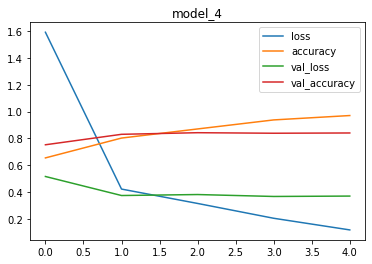

In [ ]:
import pandas as pd

pd.DataFrame(history_4.history).plot()
plt.title("model_4")

In [ ]:
# plot loss curve function

def plot_loss_curves(history):
  
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  epochs=tf.range(len(loss))
  
  plt.plot(epochs,loss,label="loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.xlabel("epochs")
  plt.ylabel("Loss")
  plt.title("Loss curve")
  plt.legend()


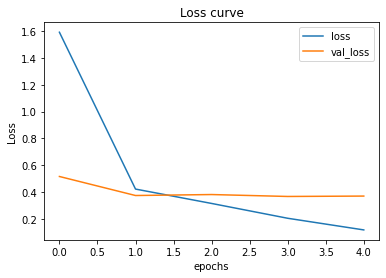

In [ ]:
plot_loss_curves(history_4)

In [ ]:
# plot accuracy curve function

def plot_accuracy_curves(history):

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=tf.range(len(accuracy))

  plt.plot(epochs,accuracy,label="accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")

  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.title("Accuracy Curve")
  plt.legend()

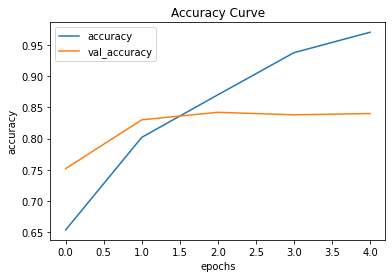

In [ ]:
plot_accuracy_curves(history_4)

🔑 If a model's `validation loss` increases it means model is **overfitted** , It learns a lot on training data and can't able to perform well on unseen data.

### **6. Improve our model**

A model can be induce overfitting by:
1. increase number of Conv layers
2. increase number of filters
3. increase number od Dense layers

Ways to reduce overfitting:
1. Add Data Augumentation
2. Regularize our layers by (Maxpool)
3. Add more data...

* **Maxpool2D**- Basically it condense the features which are identified by Convolutional layer.

* max[matrix]2x2 ==> a single value 

> Reducing overfitting is also known as **Regualrization**.

In [ ]:
model_5=Sequential([
  Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation='sigmoid')

])

In [ ]:
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history_5=model_5.fit(train_data,
                      epochs=5,
                      validation_data=valid_data,
                      steps_per_epoch=len(train_data),
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 192ms/step - loss: 0.6079 - accuracy: 0.6587 - val_loss: 0.4543 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4487 - accuracy: 0.7993 - val_loss: 0.4048 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3844 - accuracy: 0.8467 - val_loss: 0.3457 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3366 - accuracy: 0.8620 - val_loss: 0.3327 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.2923 - accuracy: 0.8887 - val_loss: 0.3603 - val_accuracy: 0.8480


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 29160)             0         
                                                                 
 dense_9 (Dense)             (None, 1)                

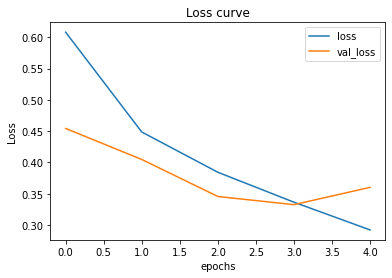

In [ ]:
plot_loss_curves(history_5)

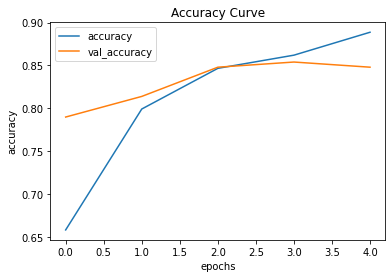

In [ ]:
plot_accuracy_curves(history_5)

> 🔑 By Regularization our model outperforms than earlier...

#### **Data Augmentation**

It is the process of **altering our training data** to have more diversity so our model can be more generalized.
* reshape our data
* rescaling
* rotating 
.....

In [ ]:
train_datagen_augmented=ImageDataGenerator(
     rotation_range=0.3, width_shift_range=0.3,
    height_shift_range=0.3,  shear_range=0.04, zoom_range=0.02,
    horizontal_flip=True, vertical_flip=True, rescale=1/255.
)

train_gen=ImageDataGenerator(rescale=1/255.)

test_gen=ImageDataGenerator(rescale=1/255.)

In [ ]:
# train data augumented
IMG_SIZE=(224,224)

print("Augumented training data:")
train_data_augumented=train_datagen_augmented.flow_from_directory(train_dir,
                                                               target_size=IMG_SIZE,
                                                               batch_size=32,
                                                               class_mode="binary",
                                                               shuffle=False,
                                                               )

print("Non-augument training data:")
train_data=train_gen.flow_from_directory(train_dir,
                                         target_size=IMG_SIZE,
                                         batch_size=32,
                                         class_mode="binary",
                                         shuffle=False)

print("Non-Augumented Test data:")
test_data=test_gen.flow_from_directory(test_dir,
                                       target_size=IMG_SIZE,
                                       batch_size=32,
                                       class_mode="binary",
                                       shuffle=False)

Augumented training data:
Found 1500 images belonging to 2 classes.
Non-augument training data:
Found 1500 images belonging to 2 classes.
Non-Augumented Test data:
Found 500 images belonging to 2 classes.


In [ ]:
images,label=train_data.next()
aug_images,aug_labels=train_data_augumented.next()

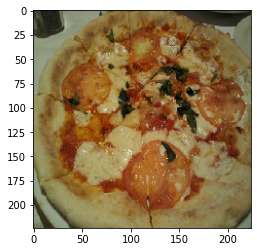

In [ ]:
plt.imshow(images[0])


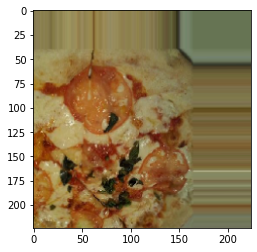

In [ ]:
plt.imshow(aug_images[0])

Text(0.5, 1.0, 'Augumented')

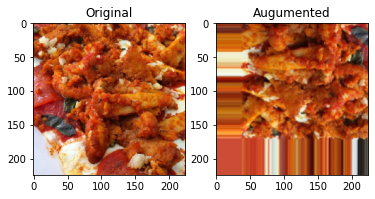

In [ ]:
import random

idx=random.randint(0,32)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(images[idx])
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(aug_images[idx])
plt.title("Augumented")

let's bulid a model on augmented data

In [ ]:
tf.random.set_seed(42)

model_6=Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         activation='relu',
         input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation='sigmoid')       
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

history_6=model_6.fit(train_data_augumented,epochs=5,
                      validation_data=test_data,
                      steps_per_epoch=len(train_data_augumented),
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 477ms/step - loss: 0.8429 - accuracy: 0.5973 - val_loss: 0.7076 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 22s 475ms/step - loss: 0.7131 - accuracy: 0.5280 - val_loss: 0.6550 - val_accuracy: 0.6840
Epoch 3/5
47/47 [==============================] - 22s 474ms/step - loss: 0.6964 - accuracy: 0.5673 - val_loss: 0.6558 - val_accuracy: 0.6600
Epoch 4/5
47/47 [==============================] - 22s 476ms/step - loss: 0.6975 - accuracy: 0.5427 - val_loss: 0.6644 - val_accuracy: 0.7380
Epoch 5/5
47/47 [==============================] - 22s 473ms/step - loss: 0.6728 - accuracy: 0.6360 - val_loss: 0.6505 - val_accuracy: 0.5780


😠 We have make our data augumented but it is still not perform well..tooks longer to train ...why ❓

let 's understand it...

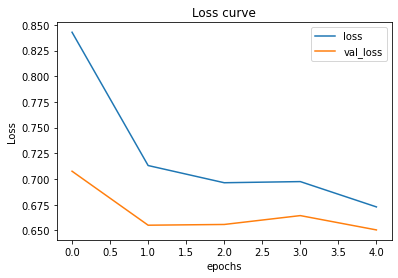

In [ ]:
plot_loss_curves(history_6)

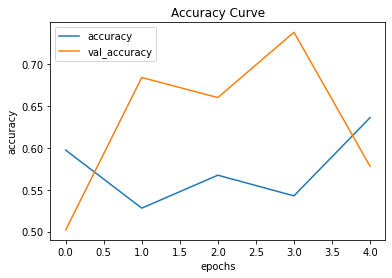

In [ ]:
plot_accuracy_curves(history_6)

**🤔 Did we shuffle our data ... ohhh 🙅**

In [ ]:
train_data_augumented_shuffle=train_datagen_augmented.flow_from_directory(train_dir,
                                                                          target_size=(224,224),
                                                                          class_mode="binary",
                                                                          batch_size=32,
                                                                          shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
tf.random.set_seed(42)

model_7=Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         activation='relu',
         input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation='sigmoid')                    
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

history_7=model_7.fit(train_data_augumented_shuffle,
                      epochs=5,
                      steps_per_epoch=len(train_data_augumented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 477ms/step - loss: 0.6686 - accuracy: 0.5933 - val_loss: 0.6473 - val_accuracy: 0.5900
Epoch 2/5
47/47 [==============================] - 22s 475ms/step - loss: 0.5752 - accuracy: 0.7127 - val_loss: 0.4248 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 22s 476ms/step - loss: 0.5336 - accuracy: 0.7340 - val_loss: 0.3859 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 22s 473ms/step - loss: 0.5099 - accuracy: 0.7587 - val_loss: 0.4052 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 22s 475ms/step - loss: 0.4749 - accuracy: 0.7793 - val_loss: 0.3956 - val_accuracy: 0.8120


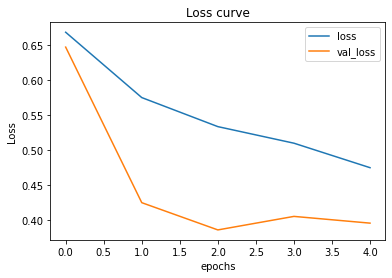

In [ ]:
plot_loss_curves(history_7)

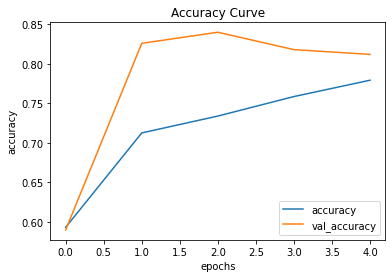

In [ ]:
plot_accuracy_curves(history_7)

**Here we can see after shuffling our data we got a good performace of our model but why**❓

✊ because when our data is not shuffled our model firstly learn the features for only one class of data after it for another class so it do some adjustment so our performace decreases... ⚓ 

### **7. Practice until satisfaction**

Improvement can be made by changing the `activation function` and `optimizer` or train for longer time `epochs`.

## **Make Prediction**

--2022-01-19 14:09:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.3’

03-steak.jpeg.3     100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-01-19 14:09:34 (32.7 MB/s) - ‘03-steak.jpeg.3’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

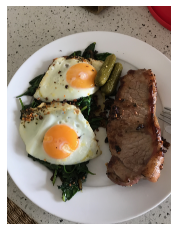

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

steak=mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis("off")

In [ ]:
model_7.predict(steak)

ValueError: ignored

In [ ]:
steak.shape

(4032, 3024, 3)

Hmmm... It is shape incompatiable.. 🧑
 
😶 we are missing our batch_size

In [ ]:
steak=tf.expand_dims(steak,axis=0)
steak.shape

TensorShape([1, 4032, 3024, 3])

In [ ]:
model_7.predict(steak)

ValueError: ignored

Hmmm .... 🤢 we missed our image shape here...

Let's create a function to preprocess our custom image for our model... 💨

In [ ]:
# hepler function ot load and preprocess an image

def load_and_preprocess_image(filename,img_size=224):

  # read an image
  img=tf.io.read_file(filename)

  # decode an image
  img=tf.image.decode_image(img)

  # resize an image
  img=tf.image.resize(img,size=[img_size,img_size])

  # rescale our image
  img=img/255.0

  return img


In [ ]:
steak=load_and_preprocess_image("03-steak.jpeg")

In [ ]:
model_7.predict(tf.expand_dims(steak,axis=0))

array([[0.92601043]], dtype=float32)

In [ ]:
class_name=['pizza','steak']
class_name

['pizza', 'steak']

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# make a function to predict and plot 

def predict_and_plot(model,filename,class_names):

  img=load_and_preprocess_image(filename)

  pred=model.predict(tf.expand_dims(img,axis=0))
  print(pred)

  if len(pred[0])>1:
    label=class_names[tf.argmax(pred[0])]
  else:
    label=class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(label)

[[0.92601043]]


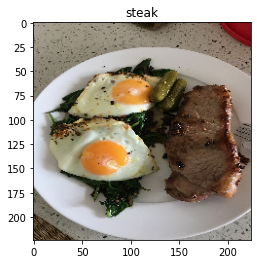

In [ ]:
predict_and_plot(model_7,"03-steak.jpeg",class_names)

[[0.03495572]]


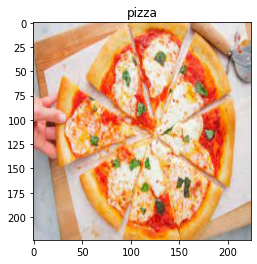

In [ ]:
predict_and_plot(model_7,"/content/pizza.jpg",class_names)

[[0.78506845]]


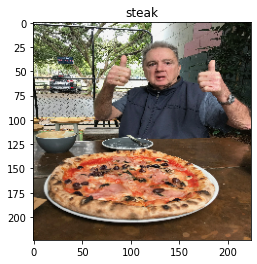

In [ ]:
predict_and_plot(model_7,"03-pizza-dad.jpeg",class_names)

# **Working with Multi class Image Classification**

Now we are going to work with more number of classes so...

1. Become one with data
2. preprocess our data
3. build a model
4. fit into model
5. evaluate our model
6. improve our model
7. Do some experiments

## **Get our data**

In [ ]:
import zipfile 

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zipref=zipfile.ZipFile("10_food_classes_all_data.zip")
zipref.extractall()
zipref.close()

--2022-01-19 14:10:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.211.128, 173.194.213.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.211.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   215MB/s    in 2.3s    

2022-01-19 14:10:25 (215 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



## **1. Become one with Data**

In [ ]:
import os

for dirpath,dirname,filename in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirname)} directories and {len(filename)} images in {dirpath}")

there are 2 directories and 0 images in 10_food_classes_all_data
there are 10 directories and 0 images in 10_food_classes_all_data/train
there are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
there are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
there are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
there are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
there are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
there are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
there are 0 directories and 750 images in 10_food_classes_all_data/train/steak
there are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
there are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
there are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
there are 10 directories and 0 imag

In [ ]:
train_dir="10_food_classes_all_data/train"
test_dir="10_food_classes_all_data/test"

In [ ]:

import pathlib
import numpy as np

data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
import random

10_food_classes_all_data/train/sushi/3313617.jpg
shape of image: (512, 512, 3)


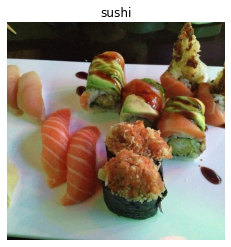

In [ ]:

view_random_image(train_dir+"/",random.choice(class_names))

## **2. preprocess our data**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.0)
test_datagen=ImageDataGenerator(rescale=1/255.0)

# read data from directory
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             )

test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## **3. Build a baseline model**

similar to cnn explainer https://poloclub.github.io/cnn-explainer/


In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
model_8=Sequential([
  Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=(224,224,3)),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation='relu'),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10,activation='softmax')                    
])

In [ ]:
model_8.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

## **4. fit model into data**

In [ ]:
history_8=model_8.fit(train_data,
                      epochs=10,
                      validation_data=test_data,
                      steps_per_epoch=len(train_data),
                      validation_steps=len(valid_data))

Epoch 1/10
235/235 [==============================] - 38s 159ms/step - loss: 2.2056 - accuracy: 0.1836 - val_loss: 2.1526 - val_accuracy: 0.2070
Epoch 2/10
235/235 [==============================] - 37s 156ms/step - loss: 1.9815 - accuracy: 0.3031 - val_loss: 2.0182 - val_accuracy: 0.2852
Epoch 3/10
235/235 [==============================] - 37s 156ms/step - loss: 1.6533 - accuracy: 0.4297 - val_loss: 2.1067 - val_accuracy: 0.2734
Epoch 4/10
235/235 [==============================] - 37s 156ms/step - loss: 1.0847 - accuracy: 0.6408 - val_loss: 2.4806 - val_accuracy: 0.2188
Epoch 5/10
235/235 [==============================] - 37s 155ms/step - loss: 0.4927 - accuracy: 0.8435 - val_loss: 3.5555 - val_accuracy: 0.2383
Epoch 6/10
235/235 [==============================] - 37s 155ms/step - loss: 0.1441 - accuracy: 0.9604 - val_loss: 4.9045 - val_accuracy: 0.2656
Epoch 7/10
235/235 [==============================] - 37s 155ms/step - loss: 0.0645 - accuracy: 0.9840 - val_loss: 5.4547 - val_ac

## **5. Evaluate our model**

In [ ]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 11s 138ms/step - loss: 7.8602 - accuracy: 0.2440


[7.8601813316345215, 0.24400000274181366]

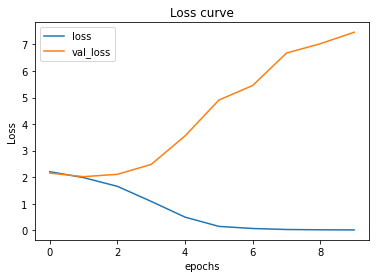

In [ ]:
plot_loss_curves(history_8)

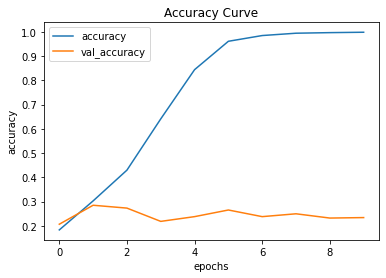

In [ ]:
plot_accuracy_curves(history_8)

These graph show that our model is overfitting ...

As validation_loss is increasing with epoch

## **6. Improve our model**

Due to it's performance on training data it shows our model learns but not genreralise so we have to regualarize it.. To remove overfitting

1. Reduce Number of hidden units
2. learning rate
3. epochs

In [ ]:
tf.random.set_seed(42)

model_9=Sequential([
  Conv2D(filters=10,kernel_size=3,input_shape=(224,224,3),activation='relu'),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10,activation='softmax')

]) 

model_9.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

history_9=model_9.fit(train_data,
                      epochs=5,
                      validation_data=test_data,
                      steps_per_epoch=len(train_data),
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 44s 185ms/step - loss: 2.1095 - accuracy: 0.2345 - val_loss: 2.0361 - val_accuracy: 0.2716
Epoch 2/5
235/235 [==============================] - 43s 184ms/step - loss: 1.8172 - accuracy: 0.3760 - val_loss: 1.8503 - val_accuracy: 0.3544
Epoch 3/5
235/235 [==============================] - 43s 183ms/step - loss: 1.5193 - accuracy: 0.4948 - val_loss: 1.8778 - val_accuracy: 0.3632
Epoch 4/5
235/235 [==============================] - 43s 184ms/step - loss: 1.0931 - accuracy: 0.6544 - val_loss: 2.0620 - val_accuracy: 0.3412
Epoch 5/5
235/235 [==============================] - 43s 182ms/step - loss: 0.6272 - accuracy: 0.8157 - val_loss: 2.4466 - val_accuracy: 0.3112


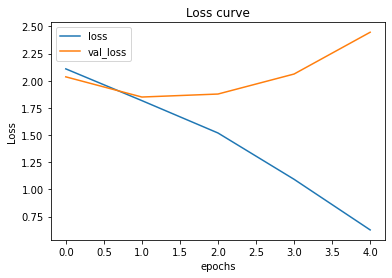

In [ ]:
plot_loss_curves(history_9)

😭 😢 still overfitting occur..

### **Let's use data augumentation**

In [ ]:
train_datagen_augumented=ImageDataGenerator(rescale=1/255.0,
                                            rotation_range=0.2,
                                            height_shift_range=0.1,
                                            width_shift_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True
                                            )

augumented_train_data=train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224,224),
                                                                  batch_size=32)


Found 7500 images belonging to 10 classes.


In [ ]:
model_10=tf.keras.models.clone_model(model_9)

model_10.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=Adam(),
                 metrics=['accuracy'])
history_10=model_10.fit(augumented_train_data,
                        epochs=5,
                        validation_data=test_data,
                        steps_per_epoch=len(augumented_train_data),
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 110s 467ms/step - loss: 2.2531 - accuracy: 0.1633 - val_loss: 2.0819 - val_accuracy: 0.2512
Epoch 2/5
235/235 [==============================] - 109s 462ms/step - loss: 2.1472 - accuracy: 0.2245 - val_loss: 2.0499 - val_accuracy: 0.2876
Epoch 3/5
235/235 [==============================] - 108s 460ms/step - loss: 2.1055 - accuracy: 0.2492 - val_loss: 2.0158 - val_accuracy: 0.2816
Epoch 4/5
235/235 [==============================] - 108s 461ms/step - loss: 2.0679 - accuracy: 0.2687 - val_loss: 1.9494 - val_accuracy: 0.3072
Epoch 5/5
235/235 [==============================] - 109s 463ms/step - loss: 2.0478 - accuracy: 0.2741 - val_loss: 1.8752 - val_accuracy: 0.3532


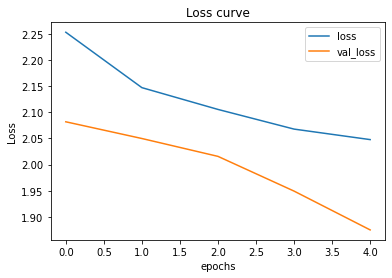

In [ ]:
plot_loss_curves(history_10)

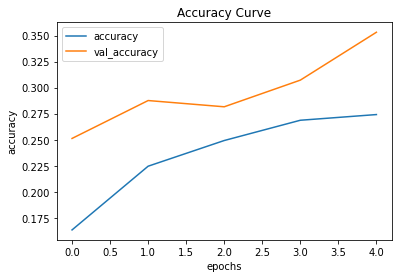

In [ ]:
plot_accuracy_curves(history_10)

**It seems it outperforms former model.. ✅**

## **7. Repeat until satisfy**

By experimenting improve our model.

## **Let's make some prediction**

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

[[0.10291632 0.02911365 0.13477519 0.04420412 0.068656   0.01201146
  0.514884   0.02733652 0.00932785 0.05677489]]


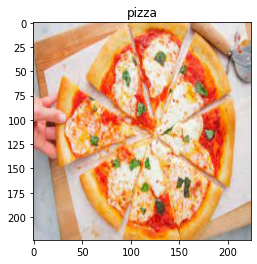

In [ ]:
predict_and_plot(model_10,"/content/pizza.jpg",class_names)

[[0.01332138 0.03053794 0.06549466 0.17001207 0.08077867 0.04128487
  0.03616234 0.22556683 0.22686954 0.10997166]]


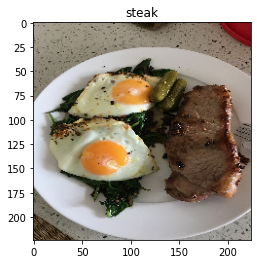

In [ ]:
predict_and_plot(model_10,"/content/03-steak.jpeg.1",class_names)

**Not All correct ...here is incorrect one**

[[0.0122564  0.04444682 0.03704325 0.04164466 0.05220022 0.07751977
  0.0996866  0.04114664 0.06819493 0.5258607 ]]


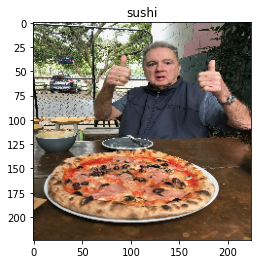

In [ ]:
predict_and_plot(model_10,"/content/03-pizza-dad.jpeg.1",class_names)

## **Now save our model**

In [ ]:
# save a model

model_10.save("Saved trained model-10")

INFO:tensorflow:Assets written to: Saved trained model-10/assets


In [ ]:
model=tf.keras.models.load_model("Saved trained model-10")
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 29160)             0         
                                                                 
 dense_16 (Dense)            (None, 10)              

In [ ]:
model.evaluate(test_data)

79/79 [==============================] - 11s 132ms/step - loss: 1.8752 - accuracy: 0.3532


[1.875185489654541, 0.3531999886035919]